# **DOPAMINE OVERLOAD PREDICTION**

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import shap

## Data Loading and Initial Exploration (EDA)

Dataset: [Digital Lifestyle Benchmark](https://www.kaggle.com/datasets/tarekmasryo/digital-health-and-mental-wellness)


In [ ]:
df = pd.read_csv("hf://datasets/tarekmasryo/digital-lifestyle-benchmark/data/Data.csv")

### Displaying Raw Data

In [ ]:
df

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
0,1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,...,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,Android,70.000000,25.700000
1,2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,...,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,Laptop,64.000000,30.100000
2,3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,...,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,Android,65.299301,40.600000
3,4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,...,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,Tablet,80.000000,36.684152
4,5,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,...,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,Android,65.299301,48.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3496,15,Female,Africa,Low,High School,Part-time/Shift,6.41,119,308,...,2.950001,4.772862,9.0,7.076726,2.4,59.0,0,Laptop,84.000000,29.600000
3496,3497,28,Female,Europe,High,Bachelor,Part-time/Shift,4.21,55,415,...,3.124953,5.520824,2.0,1.000000,8.9,27.0,1,Laptop,73.000000,23.200000
3497,3498,44,Female,Europe,Lower-Mid,Bachelor,Part-time/Shift,11.51,146,119,...,2.269790,8.518051,11.0,1.783568,7.6,56.0,0,Android,65.000000,42.400000
3498,3499,29,Female,North America,Low,Master,Full-time Employee,5.13,63,180,...,4.902579,4.238655,8.0,10.000000,2.8,52.0,0,Laptop,63.000000,20.500000


In [ ]:
df.sample(10)

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
1429,1430,39,Female,Asia,High,Bachelor,Full-time Employee,5.12,105,252,...,2.848236,3.959513,8.0,7.238870,8.8,56.0,0,Android,62.0,26.800000
600,601,31,Male,Europe,Upper-Mid,Bachelor,Unemployed_Looking,10.74,226,122,...,2.006600,6.000000,7.0,10.000000,2.2,90.0,1,iPhone,73.0,46.100000
2630,2631,39,Male,South America,Lower-Mid,PhD,Part-time/Shift,10.08,124,248,...,1.101727,8.000000,7.0,9.953952,1.1,18.0,1,Laptop,68.0,36.684152
1560,1561,25,Male,South America,Lower-Mid,Master,Full-time Employee,2.78,80,511,...,3.819529,5.000000,5.0,10.000000,0.7,24.0,0,Tablet,65.0,24.400000
2081,2082,29,Female,Europe,Upper-Mid,Master,Part-time/Shift,5.28,107,87,...,4.091327,9.510875,5.0,2.746873,8.6,82.0,0,iPhone,71.0,22.000000
1708,1709,31,Female,North America,High,Master,Full-time Employee,5.71,98,538,...,3.032938,7.622918,8.0,5.832829,6.0,13.0,0,iPhone,64.0,34.200000
3273,3274,22,Male,Africa,Upper-Mid,Bachelor,Student,11.98,144,116,...,1.000000,11.000000,12.0,10.000000,0.6,67.0,0,iPhone,72.0,36.684152
1606,1607,26,Female,Africa,Lower-Mid,High School,Full-time Employee,10.07,183,216,...,1.797763,8.824605,14.0,7.163360,4.3,26.0,0,Laptop,66.0,42.900000
336,337,23,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,9.83,188,974,...,1.914408,8.138404,14.0,10.000000,0.0,0.0,0,iPhone,57.0,62.100000
778,779,21,Female,Europe,Upper-Mid,Bachelor,Student,4.77,72,204,...,4.068832,6.532696,2.0,9.814389,1.7,59.0,1,Tablet,64.0,20.300000


### Data Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3500 non-null   int64  
 1   age                       3500 non-null   int64  
 2   gender                    3500 non-null   object 
 3   region                    3500 non-null   object 
 4   income_level              3500 non-null   object 
 5   education_level           3500 non-null   object 
 6   daily_role                3500 non-null   object 
 7   device_hours_per_day      3500 non-null   float64
 8   phone_unlocks             3500 non-null   int64  
 9   notifications_per_day     3500 non-null   int64  
 10  social_media_mins         3500 non-null   int64  
 11  study_mins                3500 non-null   int64  
 12  physical_activity_days    3500 non-null   float64
 13  sleep_hours               3500 non-null   float64
 14  sleep_qu

In [ ]:
print("shape:", df.shape)
print("\nNULL counts:\n", df.isnull().sum().sum(), " total nulls")
print("\nColumn types:\n", df.dtypes.value_counts())

shape: (3500, 24)

NULL counts:
 0  total nulls

Column types:
 float64    11
int64       7
object      6
Name: count, dtype: int64


### Checking for Missing Values

In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
region,0
income_level,0
education_level,0
daily_role,0
device_hours_per_day,0
phone_unlocks,0
notifications_per_day,0


### Descriptive Statistics and Feature Summary

In [ ]:
display(df.describe())

,id,age,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,study_mins,physical_activity_days,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,productivity_score,digital_dependence_score
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,28.078571,7.317677,147.107429,335.117143,159.362857,108.116571,3.350000,7.254481,2.708848,7.183858,8.830000,5.076560,6.418568,41.598600,0.201429,65.299301,36.684152
std,1010.507298,9.352385,3.239838,67.770656,239.678612,132.748048,79.796273,1.877976,1.291879,1.101105,5.043220,5.738959,3.403503,3.019828,23.764574,0.401125,9.664716,14.115504
min,1.000000,13.000000,0.280000,9.000000,22.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33.000000,5.600000
25%,875.750000,21.000000,4.867500,96.000000,170.000000,68.000000,42.000000,2.000000,6.410545,1.919438,4.000000,4.000000,1.341488,4.000000,24.750000,0.000000,59.000000,26.200000
50%,1750.500000,27.000000,6.760000,136.000000,268.000000,119.000000,102.000000,3.000000,7.291580,2.907819,6.000000,8.000000,4.809726,7.500000,44.000000,0.000000,65.299301,35.300000
75%,2625.250000,34.000000,9.152500,187.000000,434.000000,204.000000,163.000000,5.000000,8.162298,3.276968,8.845008,13.000000,8.794302,8.900000,59.000000,0.000000,71.000000,45.100000
max,3500.000000,50.000000,17.160000,374.000000,1211.000000,631.000000,418.000000,7.000000,11.004566,5.000000,27.154217,27.000000,10.000000,10.000000,100.000000,1.000000,95.000000,89.200000


In [ ]:
# Numeric summary
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
display(df[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
id,3500.0,1750.500000,1010.507298,1.00,875.750000,1750.500000,2625.250000,3500.000000
age,3500.0,28.078571,9.352385,13.00,21.000000,27.000000,34.000000,50.000000
device_hours_per_day,3500.0,7.317677,3.239838,0.28,4.867500,6.760000,9.152500,17.160000
phone_unlocks,3500.0,147.107429,67.770656,9.00,96.000000,136.000000,187.000000,374.000000
notifications_per_day,3500.0,335.117143,239.678612,22.00,170.000000,268.000000,434.000000,1211.000000
social_media_mins,3500.0,159.362857,132.748048,0.00,68.000000,119.000000,204.000000,631.000000
study_mins,3500.0,108.116571,79.796273,0.00,42.000000,102.000000,163.000000,418.000000
physical_activity_days,3500.0,3.350000,1.877976,0.00,2.000000,3.000000,5.000000,7.000000
sleep_hours,3500.0,7.254481,1.291879,3.00,6.410545,7.291580,8.162298,11.004566
sleep_quality,3500.0,2.708848,1.101105,1.00,1.919438,2.907819,3.276968,5.000000


In [ ]:
# Categorical summary
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    print(c, "->", df[c].nunique(), "unique")
    print(df[c].value_counts().head(6), "\n")

gender -> 2 unique
gender
Female    1835
Male      1665
Name: count, dtype: int64 

region -> 6 unique
region
Europe           797
Asia             739
North America    622
Africa           578
South America    425
Middle East      339
Name: count, dtype: int64 

income_level -> 4 unique
income_level
Low          1139
Lower-Mid    1044
Upper-Mid     842
High          475
Name: count, dtype: int64 

education_level -> 4 unique
education_level
Bachelor       1573
High School    1103
Master          652
PhD             172
Name: count, dtype: int64 

daily_role -> 5 unique
daily_role
Full-time Employee    1429
Student                905
Part-time/Shift        659
Unemployed_Looking     358
Caregiver/Home         149
Name: count, dtype: int64 

device_type -> 4 unique
device_type
Android    903
Tablet     888
Laptop     886
iPhone     823
Name: count, dtype: int64 



### Target Variable Distribution

In [ ]:
# Target balance
print(df['high_risk_flag'].value_counts())
print("\nProportions:\n", df['high_risk_flag'].value_counts(normalize=True).round(3))

high_risk_flag
0    2795
1     705
Name: count, dtype: int64

Proportions:
 high_risk_flag
0    0.799
1    0.201
Name: proportion, dtype: float64


### Data Distribution Visualizations

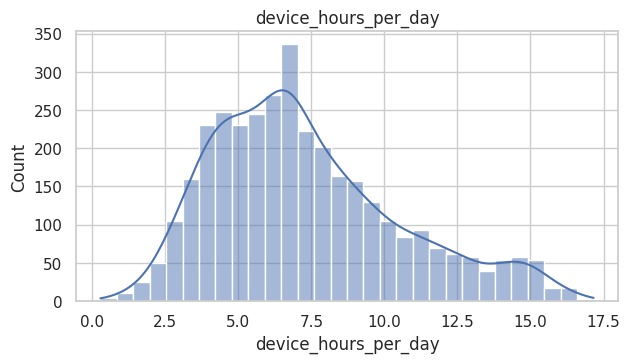

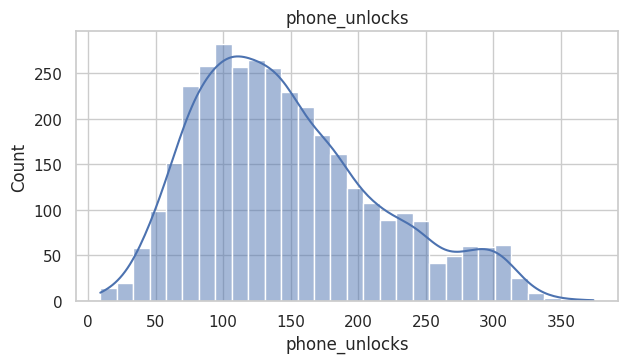

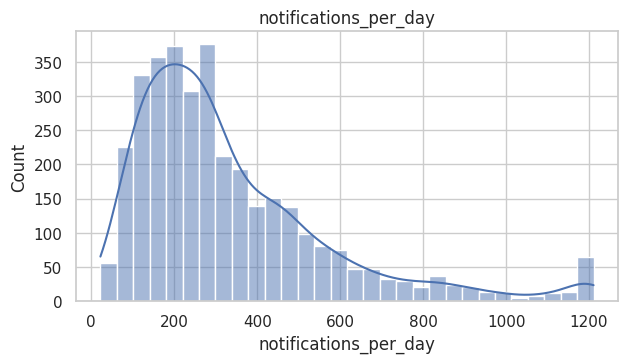

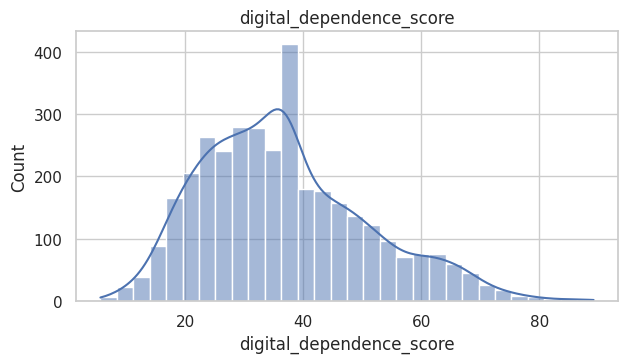

In [ ]:
# Quick histograms (run per feature or loop)
sns.set(style="whitegrid")

features = ['device_hours_per_day','phone_unlocks','notifications_per_day','digital_dependence_score']
for f in features:
    plt.figure(figsize=(7,3.5))
    sns.histplot(df[f], kde=True, bins=30)
    plt.title(f); plt.show()

### Feature Relationship Visualizations

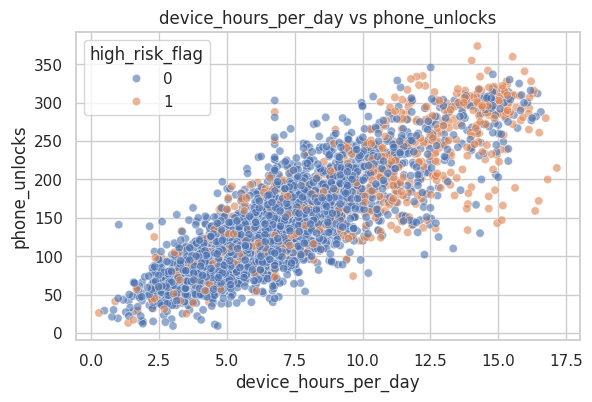

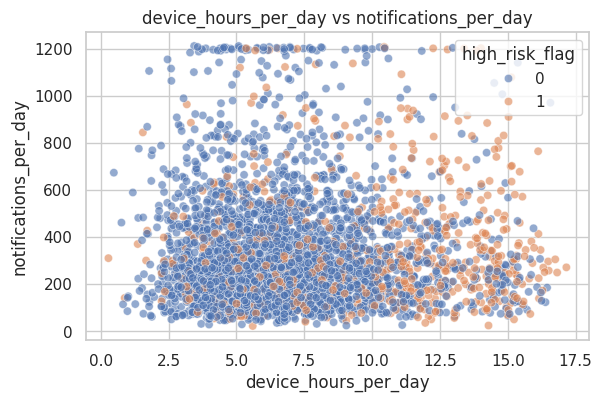

In [ ]:
# Scatter plots
plt.figure(figsize=(6.5,4))
sns.scatterplot(data=df, x='device_hours_per_day', y='phone_unlocks', hue='high_risk_flag', alpha=0.6)
plt.title("device_hours_per_day vs phone_unlocks"); plt.show()

plt.figure(figsize=(6.5,4))
sns.scatterplot(data=df, x='device_hours_per_day', y='notifications_per_day', hue='high_risk_flag', alpha=0.6)
plt.title("device_hours_per_day vs notifications_per_day"); plt.show()

### Correlation Heatmap

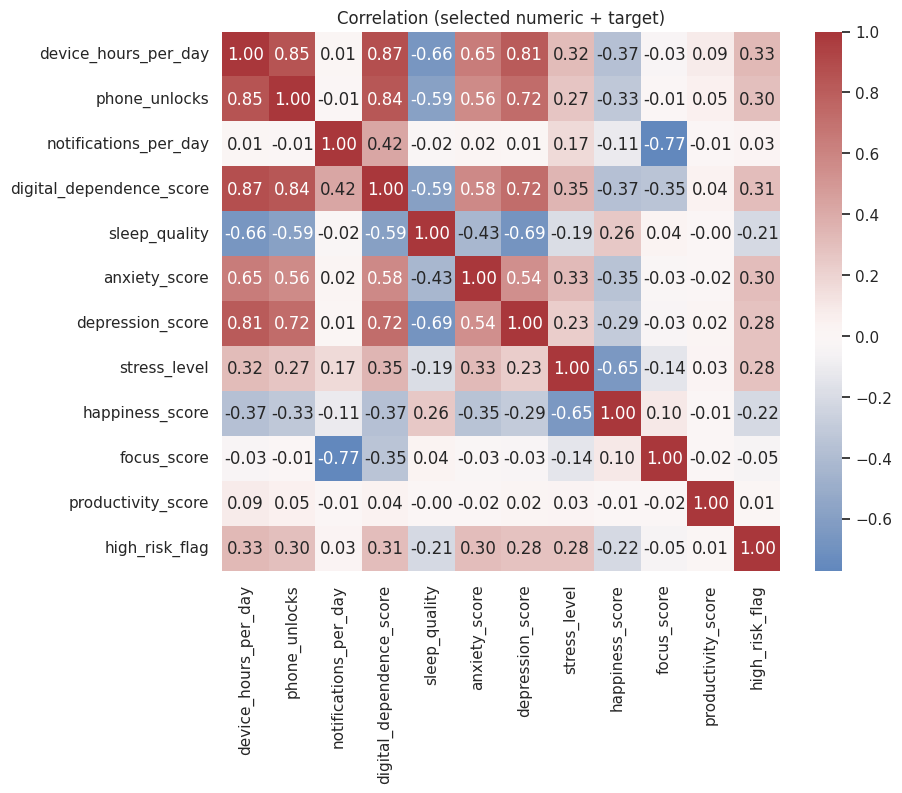

In [ ]:
# Correlation heatmap
num_for_corr = ['device_hours_per_day','phone_unlocks','notifications_per_day',
                'digital_dependence_score','sleep_quality','anxiety_score',
                'depression_score','stress_level','happiness_score','focus_score',
                'productivity_score','high_risk_flag']
corr = df[num_for_corr].corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Correlation (selected numeric + target)"); plt.show()

### Mean Values by Target Group

In [ ]:
# Means by target
group_means = df.groupby('high_risk_flag')[['device_hours_per_day','phone_unlocks','notifications_per_day',
                                            'digital_dependence_score','sleep_quality','anxiety_score']].mean().T
display(group_means)

high_risk_flag,0,1
device_hours_per_day,6.773764,9.474043
phone_unlocks,137.064043,186.924823
notifications_per_day,331.884436,347.933333
digital_dependence_score,34.520023,45.263924
sleep_quality,2.827614,2.237994
anxiety_score,6.415360,10.230597


## Data Preprocessing and Feature Engineering

### Handling Duplicates

In [ ]:
df_clean = df.copy()

before = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
after = df_clean.shape[0]

print("Rows before:", before, "After dropping duplicates:", after)

Rows before: 3500 After dropping duplicates: 3500


### Handling Missing Values

In [ ]:
missing_total = df_clean.isnull().sum().sum()
print("Total missing values:", missing_total)

Total missing values: 0


In [ ]:
num_cols = df_clean.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

# remove id + target (just for clarity)
num_cols = [c for c in num_cols if c not in ('id','high_risk_flag')]

df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())
df_clean[cat_cols] = df_clean[cat_cols].fillna("Unknown")

print("Missing values after imputation:", df_clean.isnull().sum().sum())

Missing values after imputation: 0


### Creating Additional Features

In [ ]:
df_clean['screen_time_per_unlock'] = (
    df_clean['device_hours_per_day'] * 60 / (df_clean['phone_unlocks'] + 1e-6)
)

df_clean['notifications_per_hour'] = (
    df_clean['notifications_per_day'] / (df_clean['device_hours_per_day'] + 1e-6)
)

df_clean['mental_health_load'] = (
    df_clean['anxiety_score'] +
    df_clean['depression_score'] +
    df_clean['stress_level']
)

df_clean['mood_balance'] = (
    df_clean['happiness_score'] - df_clean['stress_level']
)

display(df_clean[['screen_time_per_unlock','notifications_per_hour','mental_health_load','mood_balance']].describe().T)

,count,mean,std,min,25%,50%,75%,max
screen_time_per_unlock,3500.0,3.164222,1.201537,0.429787,2.542749,2.964711,3.502100,31.066663
notifications_per_hour,3500.0,57.385709,62.619220,1.679496,23.203051,40.278444,69.372365,1402.080412
mental_health_load,3500.0,21.090418,11.031136,1.000000,13.327715,18.499234,25.986124,60.842617
mood_balance,3500.0,1.342008,5.831758,-10.000000,-3.528605,2.481661,6.800000,9.000000


In [ ]:
df_clean.sample(10)

,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score,screen_time_per_unlock,notifications_per_hour,mental_health_load,mood_balance
3334,3335,28,Male,Europe,Low,Bachelor,Unemployed_Looking,12.55,305,566,...,6.0,37.0,0,Android,79.000000,67.9,2.468852,45.099598,31.724785,4.275215
2197,2198,23,Male,North America,Low,Bachelor,Student,4.63,139,176,...,3.3,76.0,0,Laptop,65.000000,25.0,1.998561,38.012951,9.994372,-5.694372
1069,1070,19,Male,Africa,Low,Bachelor,Unemployed_Looking,5.91,122,80,...,9.7,65.0,0,iPhone,68.000000,23.7,2.906557,13.536377,10.211876,5.488124
2418,2419,48,Female,Europe,Lower-Mid,Master,Full-time Employee,4.95,71,359,...,4.4,39.0,0,Android,69.000000,26.9,4.183099,72.525238,12.774105,-1.414193
202,203,22,Female,Africa,Lower-Mid,High School,Full-time Employee,4.82,133,111,...,9.5,75.0,0,Laptop,76.000000,23.0,2.174436,23.029041,20.723696,8.249450
1366,1367,26,Female,Europe,Low,PhD,Part-time/Shift,6.54,162,215,...,10.0,59.0,0,Android,65.000000,32.8,2.422222,32.874613,20.205574,6.711175
2205,2206,34,Female,South America,Upper-Mid,High School,Full-time Employee,4.66,9,595,...,9.0,0.0,0,Android,70.000000,25.7,31.066663,127.682376,24.058225,2.115411
517,518,26,Female,Asia,Upper-Mid,Master,Full-time Employee,1.88,52,61,...,2.1,57.0,0,Tablet,55.000000,8.8,2.169231,32.446791,13.000177,-5.900177
2911,2912,26,Female,Middle East,Lower-Mid,Bachelor,Full-time Employee,7.31,182,97,...,8.2,49.0,0,Android,69.000000,33.3,2.409890,13.269492,17.598958,5.123811
2352,2353,24,Female,Asia,Low,Master,Student,14.09,307,343,...,3.2,36.0,1,Tablet,65.299301,65.9,2.753746,24.343504,47.022276,-6.800000


### Pairplot of Key Features by Risk Group

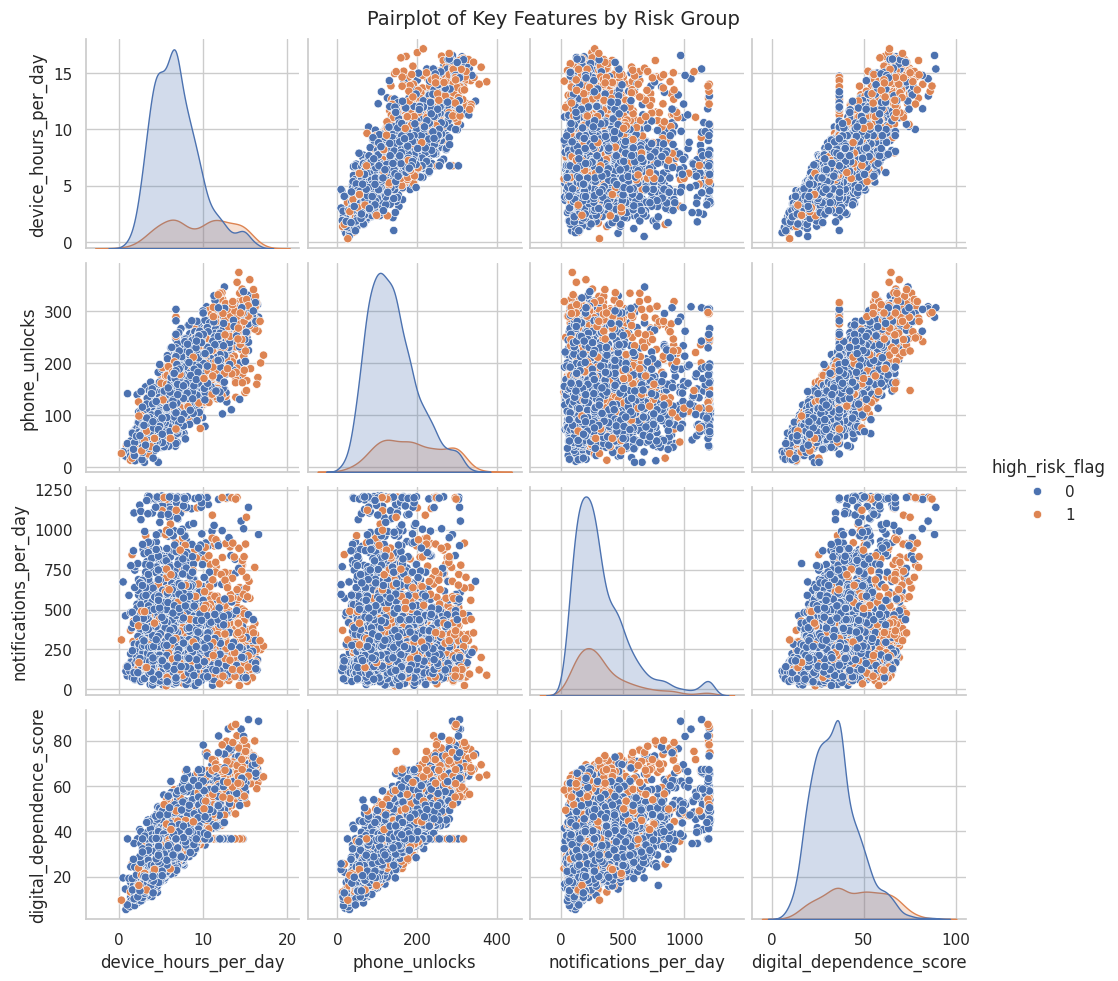

In [ ]:
sns.pairplot(df_clean, hue='high_risk_flag', vars=['device_hours_per_day', 'phone_unlocks', 'notifications_per_day', 'digital_dependence_score'])
plt.suptitle("Pairplot of Key Features by Risk Group", size=14)
plt.subplots_adjust(top=0.95)
plt.show()

### Feature Categorization

In [ ]:
numeric_features = [
    c for c in df_clean.select_dtypes(include=['int64','float64']).columns
    if c not in ('id','high_risk_flag')
]

categorical_features = df_clean.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", len(numeric_features))
print(numeric_features)
print("\nCategorical features:", len(categorical_features))
print(categorical_features)

Numeric features: 20
['age', 'device_hours_per_day', 'phone_unlocks', 'notifications_per_day', 'social_media_mins', 'study_mins', 'physical_activity_days', 'sleep_hours', 'sleep_quality', 'anxiety_score', 'depression_score', 'stress_level', 'happiness_score', 'focus_score', 'productivity_score', 'digital_dependence_score', 'screen_time_per_unlock', 'notifications_per_hour', 'mental_health_load', 'mood_balance']

Categorical features: 6
['gender', 'region', 'income_level', 'education_level', 'daily_role', 'device_type']


### Data Splitting

In [ ]:
X = df_clean.drop(columns=['high_risk_flag'])
y = df_clean['high_risk_flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train distribution:\n", y_train.value_counts(normalize=True))

Train: (2625, 27) Test: (875, 27)
Train distribution:
 high_risk_flag
0    0.798476
1    0.201524
Name: proportion, dtype: float64


### Preprocessing Pipeline Setup

In [ ]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
print("Preprocessing pipeline created.")

Preprocessing pipeline created.


### Applying Preprocessing Transformations

In [ ]:
preprocess.fit(X_train)

X_train_t = preprocess.transform(X_train)
X_test_t = preprocess.transform(X_test)

print("Transformed train:", X_train_t.shape)
print("Transformed test:", X_test_t.shape)

try:
    feature_names = preprocess.get_feature_names_out()
    print("Feature names:", len(feature_names))
    print(feature_names[:60])
except:
    print("Feature names not supported in this sklearn version.")

Transformed train: (2625, 45)
Transformed test: (875, 45)
Feature names: 45
['num__age' 'num__device_hours_per_day' 'num__phone_unlocks'
 'num__notifications_per_day' 'num__social_media_mins' 'num__study_mins'
 'num__physical_activity_days' 'num__sleep_hours' 'num__sleep_quality'
 'num__anxiety_score' 'num__depression_score' 'num__stress_level'
 'num__happiness_score' 'num__focus_score' 'num__productivity_score'
 'num__digital_dependence_score' 'num__screen_time_per_unlock'
 'num__notifications_per_hour' 'num__mental_health_load'
 'num__mood_balance' 'cat__gender_Female' 'cat__gender_Male'
 'cat__region_Africa' 'cat__region_Asia' 'cat__region_Europe'
 'cat__region_Middle East' 'cat__region_North America'
 'cat__region_South America' 'cat__income_level_High'
 'cat__income_level_Low' 'cat__income_level_Lower-Mid'
 'cat__income_level_Upper-Mid' 'cat__education_level_Bachelor'
 'cat__education_level_High School' 'cat__education_level_Master'
 'cat__education_level_PhD' 'cat__daily_role_Car

### Addressing Class Imbalance Using SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_t, y_train)

print("Shape of X_train after SMOTE:", X_train_smote.shape)
print("Distribution of y_train after SMOTE:\n", pd.Series(y_train_smote).value_counts(normalize=True))

Shape of X_train after SMOTE: (4192, 45)
Distribution of y_train after SMOTE:
 high_risk_flag
0    0.5
1    0.5
Name: proportion, dtype: float64


## Model Training

### Logistic Regression Model

In [ ]:
logreg_clf = LogisticRegression(max_iter=200, random_state=42)
logreg_clf.fit(X_train_smote, y_train_smote)

y_pred_logreg = logreg_clf.predict(X_test_t)
y_pred_proba_logreg = logreg_clf.predict_proba(X_test_t)[:, 1]

### K-Nearest Neighbors Model

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_smote, y_train_smote)

y_pred_knn = knn_clf.predict(X_test_t)
y_pred_proba_knn = knn_clf.predict_proba(X_test_t)[:, 1]

### Random Forest Model

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_clf.predict(X_test_t)
y_pred_proba_rf = rf_clf.predict_proba(X_test_t)[:, 1]

### XGBoost Classifier

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_clf.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_clf.predict(X_test_t)
y_pred_proba_xgb = xgb_clf.predict_proba(X_test_t)[:, 1]

### Support Vector Machine (SVM) Classifier

In [ ]:
svc_clf = SVC(probability=True, random_state=42)
svc_clf.fit(X_train_smote, y_train_smote)

y_pred_svc = svc_clf.predict(X_test_t)
y_pred_proba_svc = svc_clf.predict_proba(X_test_t)[:, 1]

### Linear Regression Model

In [ ]:
numeric_transformer_linreg = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])
numeric_features_for_linreg = [c for c in numeric_features if c != 'digital_dependence_score']
preprocess_linreg = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_linreg, numeric_features_for_linreg),
        ("cat", categorical_transformer, categorical_features)
    ]
)
linreg = Pipeline(steps=[
    ('preprocess', preprocess_linreg),
    ('model', RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0]))
])
y_train_linreg = X_train['digital_dependence_score']
X_train_linreg = X_train.drop(columns=['digital_dependence_score'])
linreg.fit(X_train_linreg, y_train_linreg)
y_test_linreg = X_test['digital_dependence_score']
X_test_linreg = X_test.drop(columns=['digital_dependence_score'])
linreg_pred = linreg.predict(X_test_linreg)

## Model Evaluation and Insights

In [ ]:
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n====== {name} ======")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

### Performance Metrics for Classification Models

In [ ]:
logreg_metrics = evaluate_model("Logistic Regression", y_test, y_pred_logreg)
knn_metrics = evaluate_model("kNN Classifier", y_test, y_pred_knn)
rf_metrics = evaluate_model("Random Forest", y_test, y_pred_rf)
xgb_metrics = evaluate_model("XGBoost Classifier", y_test, y_pred_xgb)
svc_metrics = evaluate_model("SVM Classifier", y_test, y_pred_svc)


====== Logistic Regression ======
Accuracy: 0.6994285714285714
Precision: 0.3627760252365931
Recall: 0.6534090909090909
F1 Score: 0.4665314401622718

====== kNN Classifier ======
Accuracy: 0.5645714285714286
Precision: 0.27472527472527475
Recall: 0.7102272727272727
F1 Score: 0.39619651347068147

====== Random Forest ======
Accuracy: 0.8697142857142857
Precision: 0.7719298245614035
Recall: 0.5
F1 Score: 0.6068965517241379

====== XGBoost Classifier ======
Accuracy: 0.872
Precision: 0.7666666666666667
Recall: 0.5227272727272727
F1 Score: 0.6216216216216216

====== SVM Classifier ======
Accuracy: 0.8
Precision: 0.5025641025641026
Recall: 0.5568181818181818
F1 Score: 0.5283018867924528


### Classification Model Comparison

In [ ]:
results = {
    "Model": ["Logistic Regression", "kNN Classifier", "Random Forest", "XGBoost Classifier", "SVM Classifier"],
    "Accuracy": [logreg_metrics['Accuracy'], knn_metrics['Accuracy'], rf_metrics['Accuracy'], xgb_metrics['Accuracy'], svc_metrics['Accuracy']],
    "Precision": [logreg_metrics['Precision'], knn_metrics['Precision'], rf_metrics['Precision'], xgb_metrics['Precision'], svc_metrics['Precision']],
    "Recall": [logreg_metrics['Recall'], knn_metrics['Recall'], rf_metrics['Recall'], xgb_metrics['Recall'], svc_metrics['Recall']],
    "F1 Score": [logreg_metrics['F1 Score'], knn_metrics['F1 Score'], rf_metrics['F1 Score'], xgb_metrics['F1 Score'], svc_metrics['F1 Score']]
}

comparison_df = pd.DataFrame(results)
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.699429,0.362776,0.653409,0.466531
1,kNN Classifier,0.564571,0.274725,0.710227,0.396197
2,Random Forest,0.869714,0.771930,0.500000,0.606897
3,XGBoost Classifier,0.872000,0.766667,0.522727,0.621622
4,SVM Classifier,0.800000,0.502564,0.556818,0.528302


### Visualizing Classification Performance

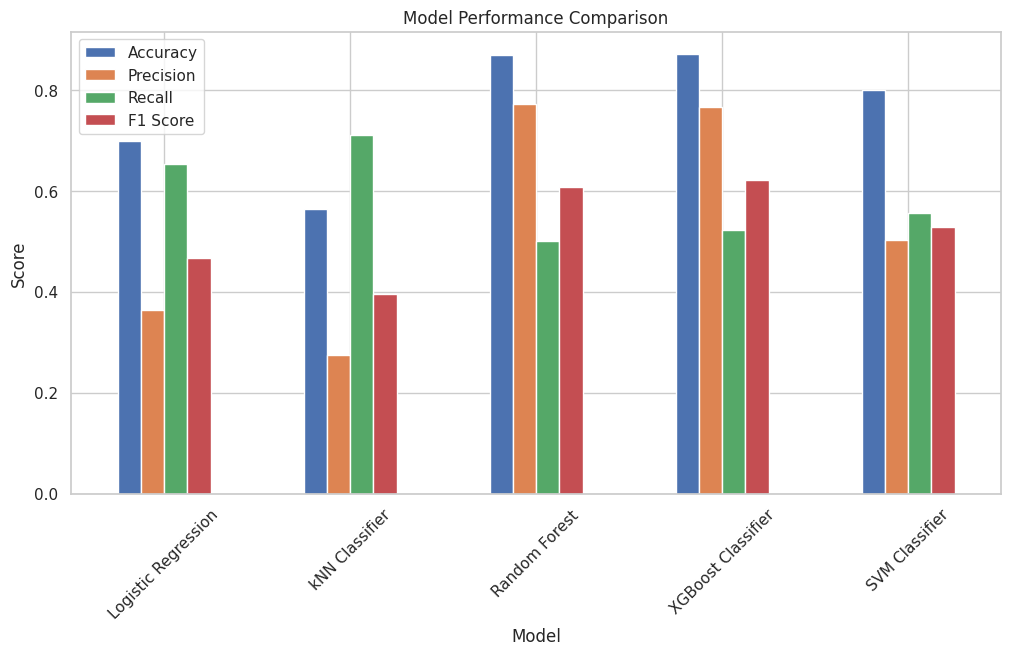

In [ ]:
comparison_df.set_index("Model")[["Accuracy","Precision","Recall","F1 Score"]].plot(
    kind="bar", figsize=(12,6), rot=45
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

### ROC Curves for Classification Models

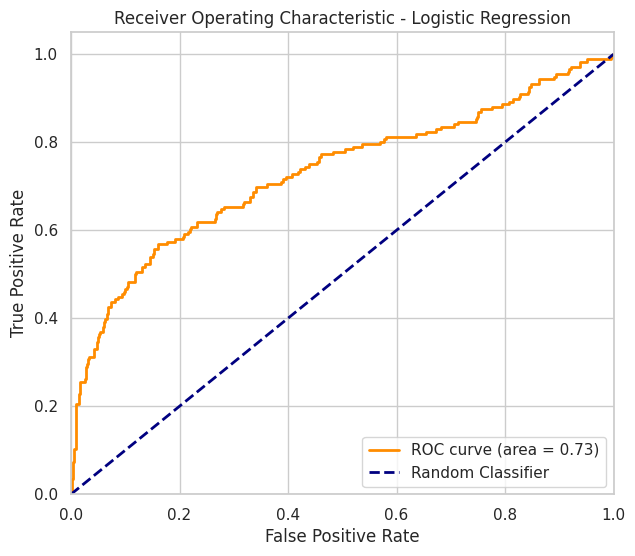

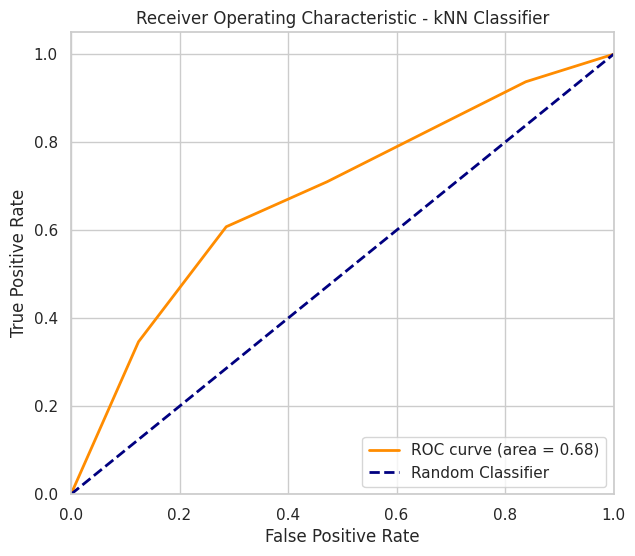

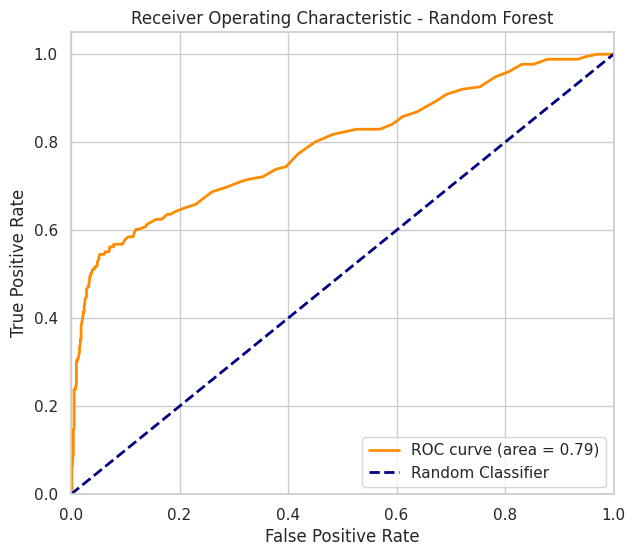

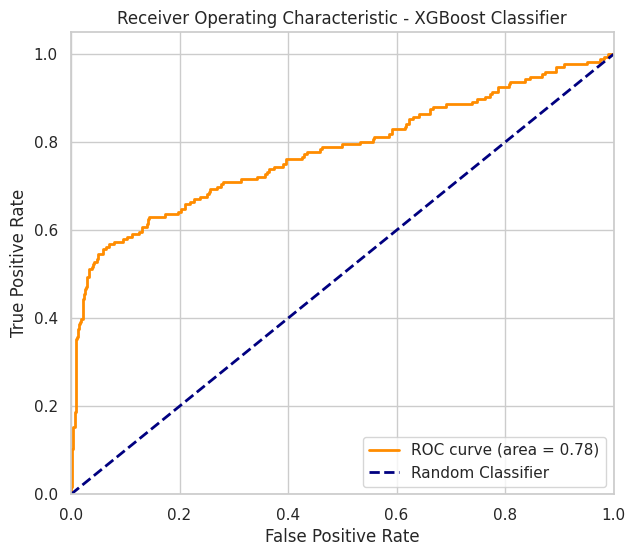

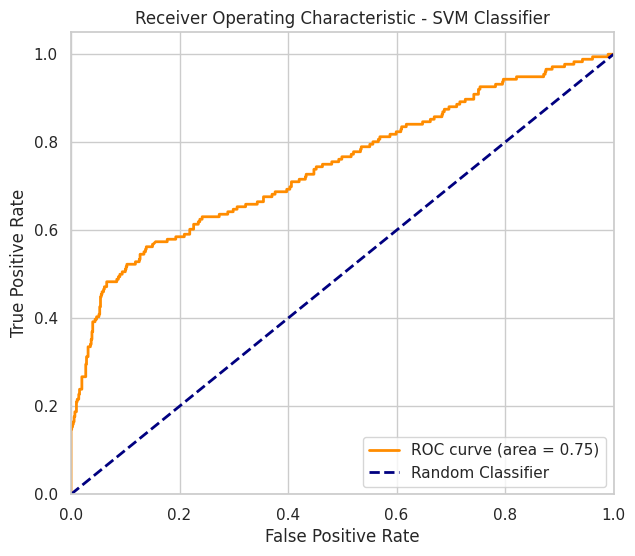

In [ ]:
# Function to plot ROC curve
def plot_roc_curve(model_name, y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# 1. Logistic Regression
y_pred_proba_logreg = logreg_clf.predict_proba(X_test_t)[:, 1]
plot_roc_curve("Logistic Regression", y_test, y_pred_proba_logreg)

# 2. K-Nearest Neighbors
y_pred_proba_knn = knn_clf.predict_proba(X_test_t)[:, 1]
plot_roc_curve("kNN Classifier", y_test, y_pred_proba_knn)

# 3. Random Forest
y_pred_proba_rf = rf_clf.predict_proba(X_test_t)[:, 1]
plot_roc_curve("Random Forest", y_test, y_pred_proba_rf)

# 4. XGBoost Classifier
plot_roc_curve("XGBoost Classifier", y_test, y_pred_proba_xgb)

# 5. Support Vector Machine
plot_roc_curve("SVM Classifier", y_test, y_pred_proba_svc)

### Confusion Matrices for Classification Models

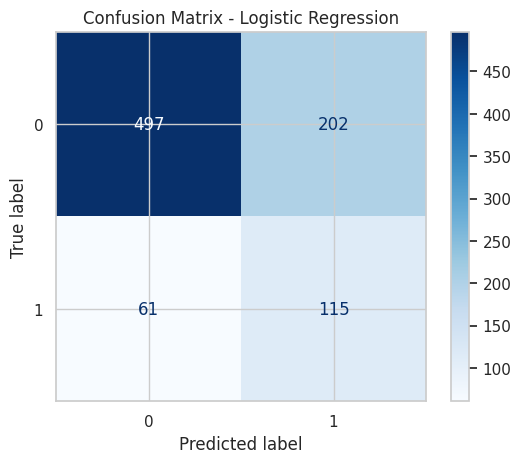

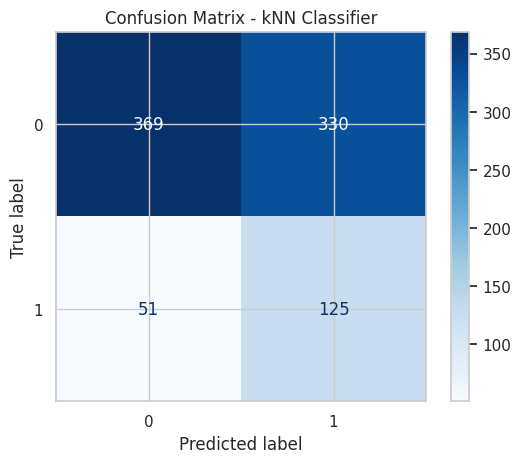

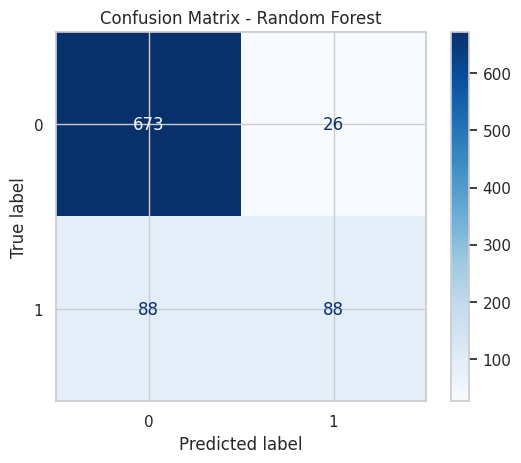

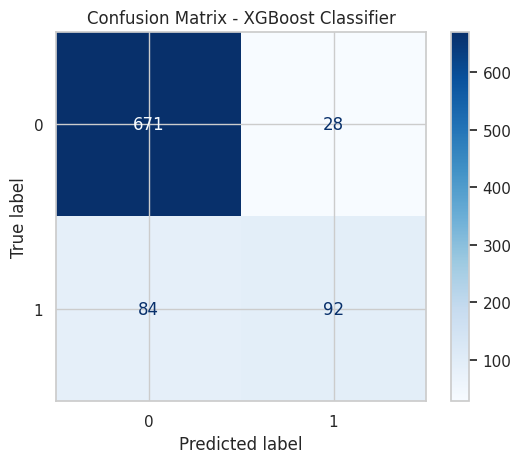

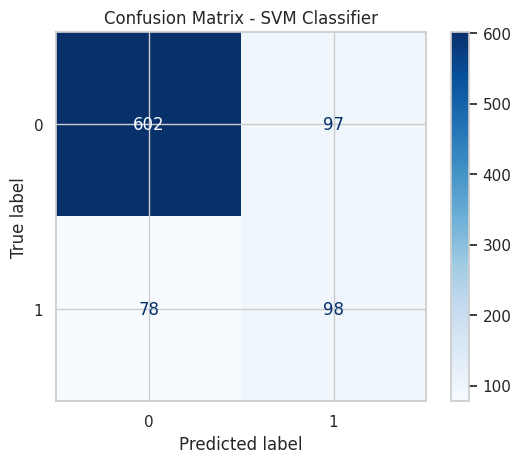

In [ ]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# 1. Logistic Regression
plot_confusion_matrix("Logistic Regression", y_test, y_pred_logreg)

# 2. K-Nearest Neighbors
plot_confusion_matrix("kNN Classifier", y_test, y_pred_knn)

# 3. Random Forest
plot_confusion_matrix("Random Forest", y_test, y_pred_rf)

# 4. XGBoost Classifier
plot_confusion_matrix("XGBoost Classifier", y_test, y_pred_xgb)

# 5. Support Vector Machine
plot_confusion_matrix("SVM Classifier", y_test, y_pred_svc)

### SHAP Summary Plot for XGBoost Model

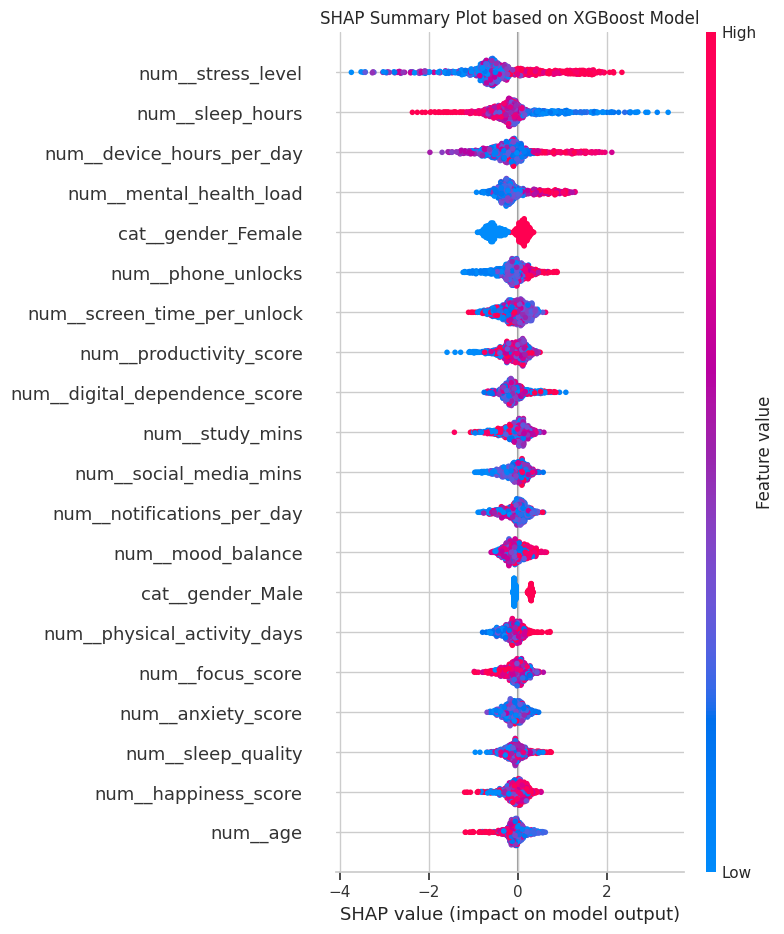

In [ ]:
feature_names = preprocess.get_feature_names_out()

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test_t)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_t, feature_names=feature_names, show=False)
plt.title("SHAP Summary Plot based on XGBoost Model")
plt.tight_layout()
plt.show()

### XGBoost Feature Importance

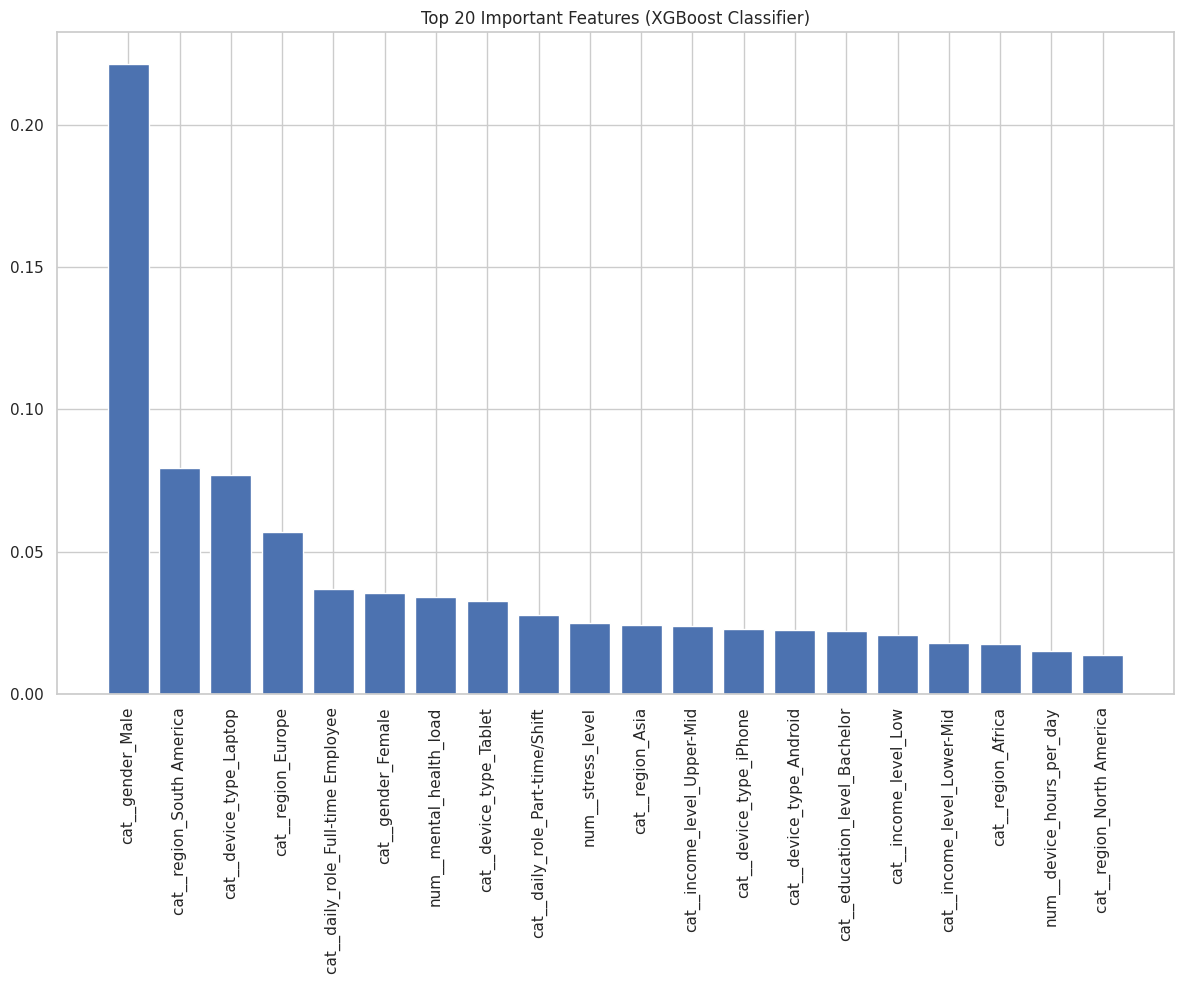

In [ ]:
importances_xgb = xgb_clf.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

plt.figure(figsize=(12,10))
plt.title("Top 20 Important Features (XGBoost Classifier)")
plt.bar(range(20), importances_xgb[indices_xgb][:20])
plt.xticks(range(20), [feature_names[i] for i in indices_xgb[:20]], rotation=90)
plt.tight_layout()
plt.show()

### Random Forest Feature Importance

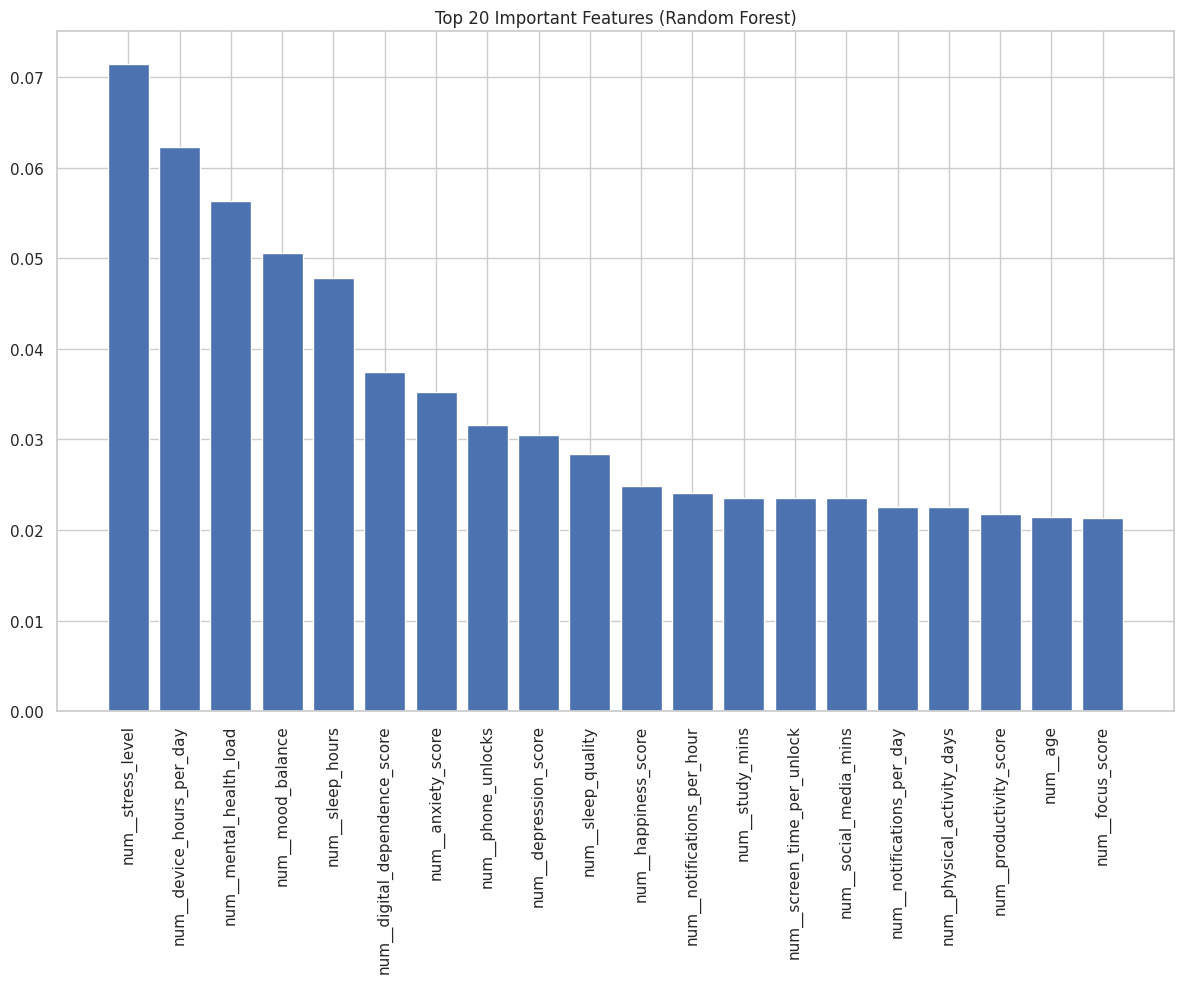

In [ ]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,10))
plt.title("Top 20 Important Features (Random Forest)")
plt.bar(range(20), importances[indices][:20])
plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=90)
plt.tight_layout()
plt.show()

### Linear Regression Evaluation

In [ ]:
print("\n====== Linear Regression (Ridge) ======")
mse = mean_squared_error(y_test_linreg, linreg_pred)
r2 = r2_score(y_test_linreg, linreg_pred)

print(f"Mean Squared Error (MSE) for digital_dependence_score prediction: {mse:.2f}")
print(f"R-squared (R2) for digital_dependence_score prediction: {r2:.2f}")


====== Linear Regression (Ridge) ======
Mean Squared Error (MSE) for digital_dependence_score prediction: 5.40
R-squared (R2) for digital_dependence_score prediction: 0.97


### Linear Regression: True vs Predicted

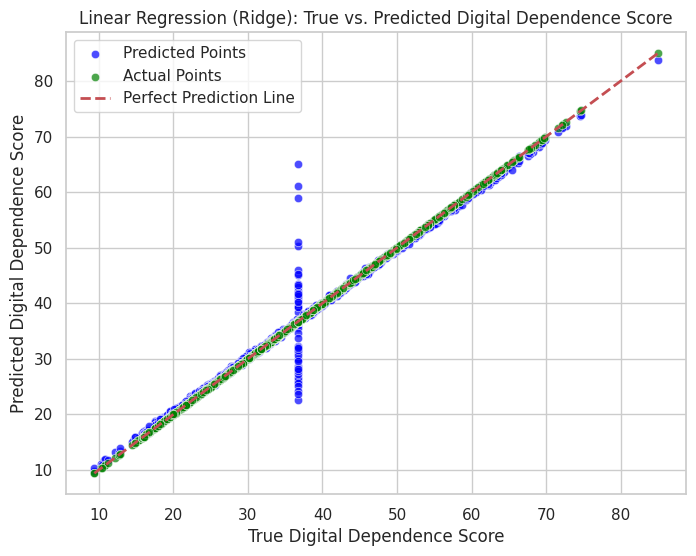

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_linreg, y=linreg_pred, alpha=0.7, label='Predicted Points', color='blue')
sns.scatterplot(x=y_test_linreg, y=y_test_linreg, alpha=0.7, label='Actual Points',  color='green')
plt.plot([y_test_linreg.min(), y_test_linreg.max()], [y_test_linreg.min(), y_test_linreg.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title('Linear Regression (Ridge): True vs. Predicted Digital Dependence Score')
plt.xlabel('True Digital Dependence Score')
plt.ylabel('Predicted Digital Dependence Score')
plt.grid(True)
plt.legend()
plt.show()

### Residual Plot for Linear Regression

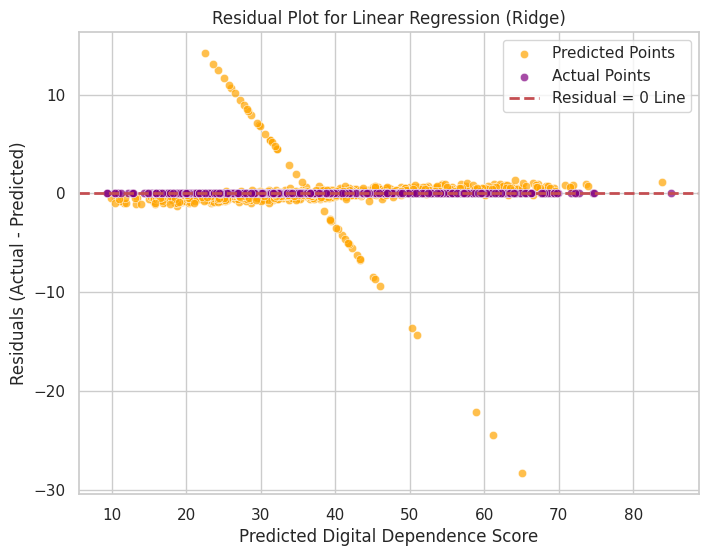

In [ ]:
residuals = y_test_linreg - linreg_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=linreg_pred, y=residuals, alpha=0.7, label='Predicted Points', color='orange')
sns.scatterplot(x=y_test_linreg, y=np.zeros_like(y_test_linreg), alpha=0.7,label='Actual Points', color='purple')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Residual = 0 Line')
plt.title('Residual Plot for Linear Regression (Ridge)')
plt.xlabel('Predicted Digital Dependence Score')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.legend()
plt.show()

## Comprehensive Model Summary

In [ ]:
classification_data = [
    {"Model": "Logistic Regression", "Type": "Classification", "Metric": "Accuracy", "Value": logreg_metrics['Accuracy']},
    {"Model": "Logistic Regression", "Type": "Classification", "Metric": "Precision", "Value": logreg_metrics['Precision']},
    {"Model": "Logistic Regression", "Type": "Classification", "Metric": "Recall", "Value": logreg_metrics['Recall']},
    {"Model": "Logistic Regression", "Type": "Classification", "Metric": "F1 Score", "Value": logreg_metrics['F1 Score']},
    {"Model": "kNN Classifier", "Type": "Classification", "Metric": "Accuracy", "Value": knn_metrics['Accuracy']},
    {"Model": "kNN Classifier", "Type": "Classification", "Metric": "Precision", "Value": knn_metrics['Precision']},
    {"Model": "kNN Classifier", "Type": "Classification", "Metric": "Recall", "Value": knn_metrics['Recall']},
    {"Model": "kNN Classifier", "Type": "Classification", "Metric": "F1 Score", "Value": knn_metrics['F1 Score']},
    {"Model": "Random Forest", "Type": "Classification", "Metric": "Accuracy", "Value": rf_metrics['Accuracy']},
    {"Model": "Random Forest", "Type": "Classification", "Metric": "Precision", "Value": rf_metrics['Precision']},
    {"Model": "Random Forest", "Type": "Classification", "Metric": "Recall", "Value": rf_metrics['Recall']},
    {"Model": "Random Forest", "Type": "Classification", "Metric": "F1 Score", "Value": rf_metrics['F1 Score']},
    {"Model": "XGBoost Classifier", "Type": "Classification", "Metric": "Accuracy", "Value": xgb_metrics['Accuracy']},
    {"Model": "XGBoost Classifier", "Type": "Classification", "Metric": "Precision", "Value": xgb_metrics['Precision']},
    {"Model": "XGBoost Classifier", "Type": "Classification", "Metric": "Recall", "Value": xgb_metrics['Recall']},
    {"Model": "XGBoost Classifier", "Type": "Classification", "Metric": "F1 Score", "Value": xgb_metrics['F1 Score']},
    {"Model": "SVM Classifier", "Type": "Classification", "Metric": "Accuracy", "Value": svc_metrics['Accuracy']},
    {"Model": "SVM Classifier", "Type": "Classification", "Metric": "Precision", "Value": svc_metrics['Precision']},
    {"Model": "SVM Classifier", "Type": "Classification", "Metric": "Recall", "Value": svc_metrics['Recall']},
    {"Model": "SVM Classifier", "Type": "Classification", "Metric": "F1 Score", "Value": svc_metrics['F1 Score']}
]

regression_data = [
    {"Model": "Linear Regression", "Type": "Regression", "Metric": "MSE", "Value": mse},
    {"Model": "Linear Regression", "Type": "Regression", "Metric": "R2 Score", "Value": r2}
]

all_models_summary_df = pd.DataFrame(classification_data + regression_data)

display(all_models_summary_df)

,Model,Type,Metric,Value
0,Logistic Regression,Classification,Accuracy,0.699429
1,Logistic Regression,Classification,Precision,0.362776
2,Logistic Regression,Classification,Recall,0.653409
3,Logistic Regression,Classification,F1 Score,0.466531
4,kNN Classifier,Classification,Accuracy,0.564571
5,kNN Classifier,Classification,Precision,0.274725
6,kNN Classifier,Classification,Recall,0.710227
7,kNN Classifier,Classification,F1 Score,0.396197
8,Random Forest,Classification,Accuracy,0.869714
9,Random Forest,Classification,Precision,0.771930


**Submitted by:**
* *Zihan Manbit*
* *Batch: CSE-58[A]*
* *ID No.: 231-115-028*